In [1]:
# Otimizar sklearn
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


# Imports

In [17]:
import pandas as pd

import matplotlib.pyplot as plt

# Modelos
from sklearn.linear_model import LogisticRegression

# Train/Test
from sklearn.model_selection import cross_val_score, cross_val_predict

# Matriz de confusão
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Precision/Recall
from sklearn.metrics import PrecisionRecallDisplay


# Rodar modelos

In [ ]:
colors = {
    'Entertainment': 'red',
    'Independence': 'orange',
    'Machine Learning': 'green',
    'News': 'blue',
    'Science': 'purple',
    'Software Development': 'brown',
    'Sprituality': 'gray',
    'Wellness': 'cyan'
}


## Logistic Regression

In [7]:
def logistic_regression():
    return LogisticRegression(max_iter=500)

### BOW

In [3]:
bow = pd\
    .read_feather('../smote/bow.feather')\
    .sample(frac=1)
# bow.head()

In [ ]:
y_true = bow['Topic']
X = bow.drop(columns=['Topic'])
# print(y_true.head())
# print(X.head())

#### Cross Validation

In [ ]:
scores = cross_val_score(logistic_regression(), X, y_true, cv=5, verbose=2)
print(scores.mean())

In [ ]:
for topic in colors:
    # score = model.score(X_test, y_test)
    print(f'Score para {topic}')
    y_true = bow['Topic'].apply(lambda x: topic if x == topic else f'Não {topic}')
    print('1')
    X = bow.drop(columns=['Topic'])
    print('2')
    scores = cross_val_score(logistic_regression(), X, y_true, cv=10)
    print('3')
    print(scores.mean())

In [8]:
# y_pred = cross_val_predict(logistic_regression(), X, y_true, cv=10)
y_pred = cross_val_predict(logistic_regression(), bow.drop(columns=['Topic']), bow['Topic'], cv=5)

In [12]:
y_pred

array(['News', 'Independence', 'News', ..., 'Wellness', 'Independence',
       'Entertainment'], dtype=object)

[[548  32   7  20  40   3  18  10]
 [ 59 557   6   8  39   3   3   3]
 [ 28  48 519  25  24  18  10   6]
 [ 69  26   7 505  27  15  12  17]
 [ 83  32   6  64 471   6  10   6]
 [  9   4  16  17  11 613   4   4]
 [ 49  17   6  23  29   4 546   4]
 [  0   0   2  60   0   0   1 615]]


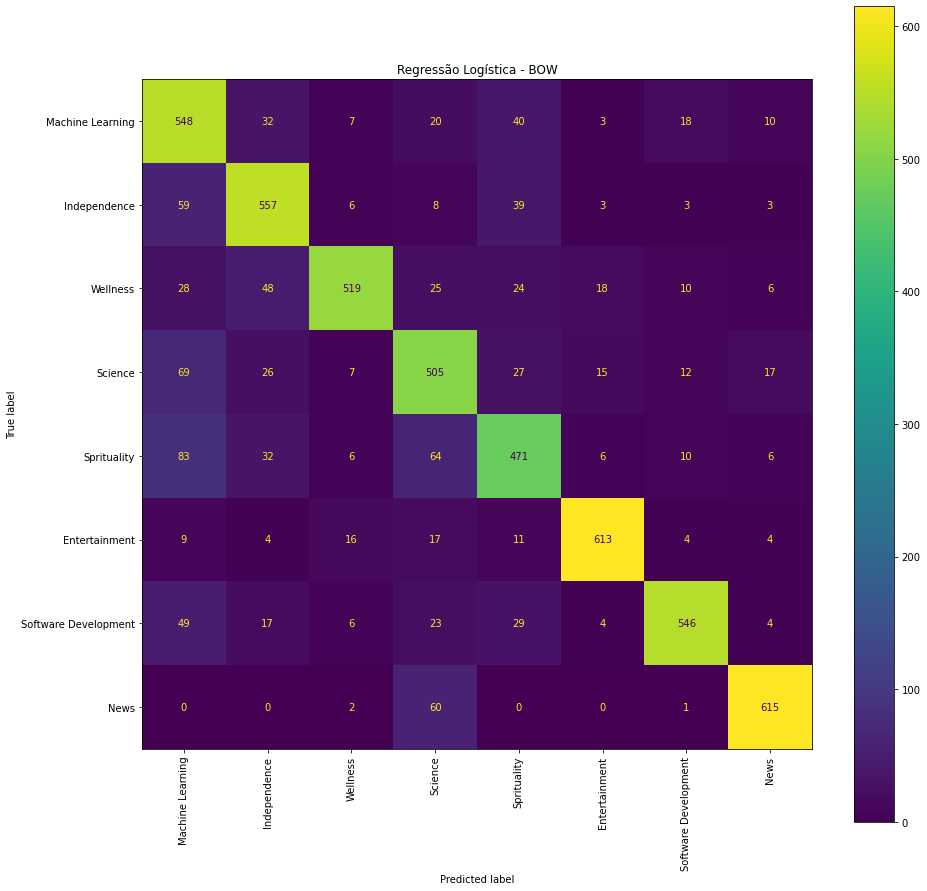

array([[548,  32,   7,  20,  40,   3,  18,  10],
       [ 59, 557,   6,   8,  39,   3,   3,   3],
       [ 28,  48, 519,  25,  24,  18,  10,   6],
       [ 69,  26,   7, 505,  27,  15,  12,  17],
       [ 83,  32,   6,  64, 471,   6,  10,   6],
       [  9,   4,  16,  17,  11, 613,   4,   4],
       [ 49,  17,   6,  23,  29,   4, 546,   4],
       [  0,   0,   2,  60,   0,   0,   1, 615]], dtype=int64)

In [21]:
cm = confusion_matrix(bow['Topic'], y_pred)
print(cm)
f = ConfusionMatrixDisplay(
	cm,
	display_labels=bow['Topic'].unique()
)
fig, ax = plt.subplots(figsize=(15, 15))
f.plot(ax=ax, xticks_rotation='vertical')
plt.title('Regressão Logística - BOW')
plt.show()
cm

In [11]:
# y_score = classifier.decision_function(X)

display = PrecisionRecallDisplay.from_predictions(y_true, y_pred, name="Logistic Regression")
_ = display.ax_.set_title("2-class Precision-Recall curve")

TypeError: __init__() missing 2 required positional arguments: 'precision' and 'recall'

-----


# Scores

| Notícias | Score (Média) |
| --- | --- |
| Todos | 0.8038 |
| Entertainment| |
| Independence| |
| Machine Learning| |
| News | |
| Science | |
| Software Development | |
| Sprituality | |
| Wellness | |
